In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/nisar/Downloads/au_train.csv')
df_test = pd.read_csv('C:/Users/nisar/Downloads/au_test.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Changing column name class to Salary because Class is a keyword and it might lead to errors in future.

df = df.rename(columns={'class': 'Salary'})
df_test = df_test.rename(columns={'class': 'Salary'})

In [4]:
#------Identifying Data Types------
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#------------Columns containig "?" values-------

print(df['workclass'].str.contains("\?").sum())
print(df['occupation'].str.contains("\?").sum())
print(df['native-country'].str.contains("\?").sum())

print(df_test['workclass'].str.contains("\?").sum())
print(df_test['occupation'].str.contains("\?").sum())
print(df_test['native-country'].str.contains("\?").sum())


1836
1843
583
963
966
274


In [6]:
#-------Converting "?" values to Nan-----
df['workclass'] = df['workclass'].str.strip()
df['workclass'].replace("?",np.nan, inplace= True)

df['occupation'] = df['occupation'].str.strip()
df['occupation'].replace("?",np.nan, inplace= True)

df['native-country'] = df['native-country'].str.strip()
df['native-country'].replace("?",np.nan, inplace= True)


df_test['workclass'] = df_test['workclass'].str.strip()
df_test['workclass'].replace("?",np.nan, inplace= True)

df_test['occupation'] = df_test['occupation'].str.strip()
df_test['occupation'].replace("?",np.nan, inplace= True)

df_test['native-country'] = df_test['native-country'].str.strip()
df_test['native-country'].replace("?",np.nan, inplace= True)


In [7]:
#---------------Dealing with missing values----------
# Since missing values are approx 5 percent of total data, it is safe to remove them

df = df.dropna()
df_test = df_test.dropna()
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df['Salary'].value_counts()

#-------Dependent variable to Biased!----

 <=50K    22654
 >50K      7508
Name: Salary, dtype: int64

<AxesSubplot:xlabel='workclass'>

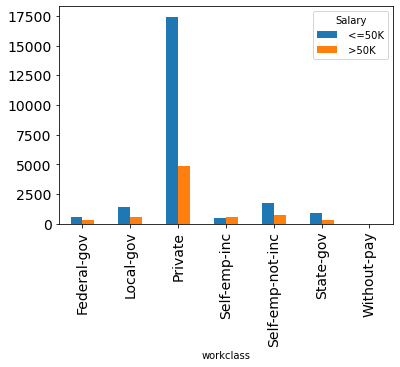

In [9]:
#--------Understanding Features (Workclass)---------

df.groupby(["Salary","workclass"]).size().unstack("Salary").plot(kind="bar",fontsize=14)

<AxesSubplot:xlabel='education'>

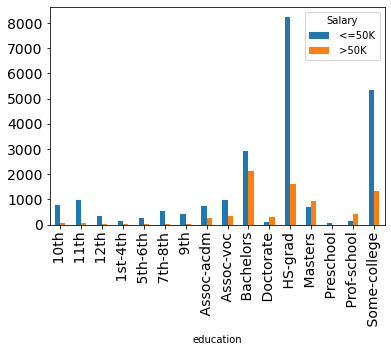

In [10]:
#---------Understanding Features (Education)--------
df.groupby(["Salary","education"]).size().unstack("Salary").plot(kind="bar",fontsize=14)

C:\Users\nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


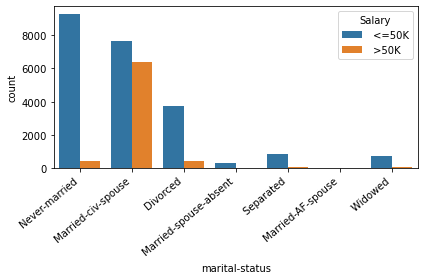

In [11]:
#----------Understanding Features (Marital-Status) ---------
ax = sns.countplot(df['marital-status'], hue=df['Salary'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

<AxesSubplot:xlabel='sex'>

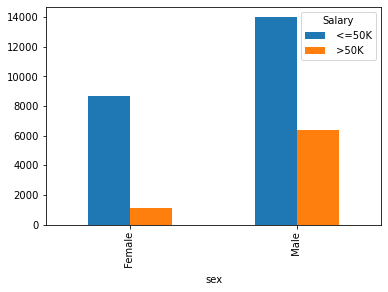

In [12]:
#---------Understanding Features(Sex)------
df.groupby(["Salary","sex"]).size().unstack("Salary").plot(kind="bar")

#Dominantly more males earn >50k than female. Also, more number of males earn <50k than females but the comparision ratio is way higher for >50k!

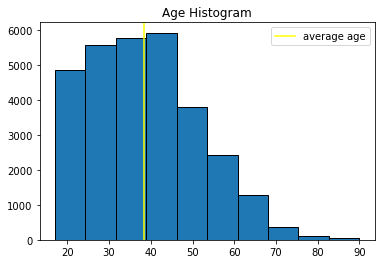

In [13]:
#-----Understanding Features (Age)----------

plt.hist(df['age'], edgecolor='black')
plt.title('Age Histogram')
plt.axvline(np.mean(df['age']), color='yellow', label='average age')
plt.legend()


C:\Users\nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '')

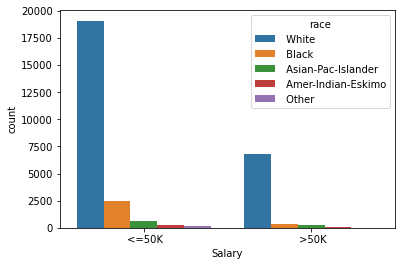

In [14]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

ax = sns.countplot(df['Salary'], hue=df['race'])
ax.set_title('')

C:\Users\nisar\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


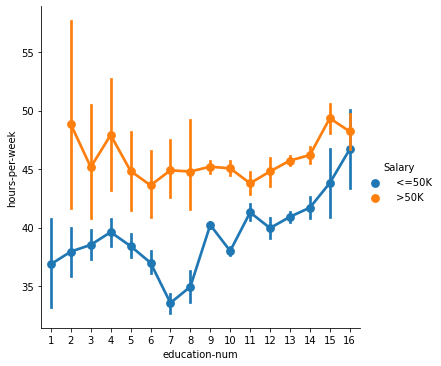

In [15]:
sns.factorplot(data=df, x='education-num', y='hours-per-week', hue='Salary', kind='point')

#Inf: Most people who work atleast 36 to 70 hours a week earn more than 50K

In [16]:
#--------Dealing with categorical values---------
categorical_df = df.select_dtypes(include=['object'])
categorical_df.columns

categorical_df = categorical_df.apply(enc.fit_transform)
categorical_df.head()


categorical_df_test = df_test.select_dtypes(include=['object'])
categorical_df.columns

categorical_df_test = categorical_df_test.apply(enc.fit_transform)
categorical_df_test.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
0,2,1,4,6,3,2,1,37,0
1,2,11,2,4,0,4,1,37,0
2,1,7,2,10,0,4,1,37,1
3,2,15,2,6,0,2,1,37,1
5,2,0,4,7,1,4,1,37,0


In [17]:
df = df.drop(categorical_df.columns, axis=1)
df = pd.concat([df, categorical_df], axis=1)
df.head()

df_test = df_test.drop(categorical_df_test.columns, axis=1)
df_test = pd.concat([df_test, categorical_df_test], axis=1)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
0,39,77516,13,2174,0,40,5,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,4,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,2,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,2,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,2,9,2,9,5,2,0,4,0


<AxesSubplot:>

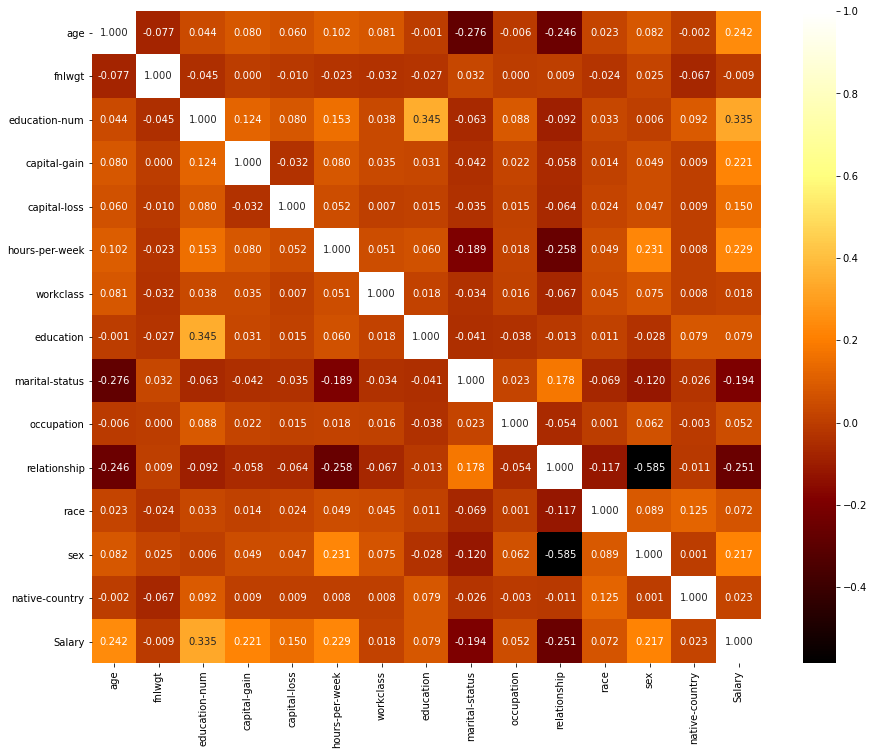

In [18]:
#-------------Correlation---------
plt.figure(figsize=(15,12))
cor_map = df.corr()
sns.heatmap(cor_map, annot=True, fmt='.3f', cmap='afmhot')

In [19]:
#Inference: 

'''
There are certain features that have decent corelation amongst them.
1. Sex and Marital Status
2. Age and marital status
3. Sex and Relationship
4. Education and Education num
'''

'\nThere are certain features that have decent corelation amongst them.\n1. Sex and Marital Status\n2. Age and marital status\n3. Sex and Relationship\n4. Education and Education num\n'